<a href="https://colab.research.google.com/github/Vignesh424/Linear-Regression-Simple-and-Multiple/blob/main/Simple_and_Multiple_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Simple Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.

In [ ]:
#Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Read the csv
dataset=pd.read_csv('/content/student_scores.csv')

In [ ]:
#Find the dimensionality of the DataFrame
dataset.shape

(25, 2)

In [ ]:
#Computes a summary of statistics pertaining to the DataFrame columns.
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#Print first 5 columns 
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


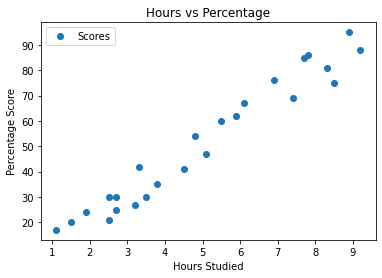

In [ ]:
#Plot the graph
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

**Preparing the Data**

Now we have an idea about statistical details of our data. The next step is to divide the data into "attributes" and "labels".

Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset we only have two columns.

We want to predict the percentage score depending upon the hours studied. Therefore our attribute set will consist of the "Hours" column, and the label will be the "Score" column.

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

The attributes are stored in the X variable. We specified "-1" as the range for columns since we wanted our attribute set to contain all the columns except the last one, which is "Scores". Similarly the y variable contains the labels. We specified 1 for the label column since the index for "Scores" column is 1.

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:


In [ ]:
#import packages for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

2.018160041434662
[9.91065648]


This means that for every one unit of change in hours studied, the change in the score is about 9.91%. Or in simpler words, if a student studies one hour more than they previously studied for an exam, they can expect to achieve an increase of 9.91% in the score achieved by the student previously.

**Making Predictions**

In [ ]:
y_pred = regressor.predict(X_test)

The y_pred is a numpy array that contains all the predicted values for the input values in the X_test series.

To compare the actual output values for X_test with the predicted values, execute the following manner

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Though our model is not very precise, the predicted percentages are close to the actual ones.

**Evaluating the Algorithm**

The final step is to evaluate the performance of algorithm.

This step is particularly important to compare how well different algorithms perform on a particular dataset.

For regression algorithms, three evaluation metrics are

In [ ]:
from sklearn import metrics
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48.

This means that our algorithm did a decent job.




**Multiple Linear Regression.**

Almost all real world problems that you are going to encounter will have more than two variables. Linear regression involving multiple variables is called "multiple linear regression".

The steps to perform multiple linear regression are almost similar to that of simple linear regression. The difference lies in the evaluation.

we will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.

In [ ]:
#import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Read the csv
dataset_MLR = pd.read_csv('/content/petrol_consumption.csv')

In [ ]:
#Find the dimensionality of the DataFrame
dataset_MLR.shape

(48, 5)

In [ ]:
#Computes a summary of statistics pertaining to the DataFrame columns.
dataset_MLR.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [ ]:
#Print 10 columns
dataset_MLR.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
# Preparing the data

X = dataset_MLR[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']]

y = dataset_MLR['Petrol_Consumption']

In [ ]:
#import packages
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Training the Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121



This means that for a unit increase in "petrol_tax", there is a decrease of 40.01 million gallons in gas consumption.

Similarly, a unit increase in proportion of population with a drivers license results in an increase of 1.341 billion gallons of gas consumption.

We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption.

In [ ]:
# Making Predictions
y_pred = regressor.predict(X_test)

# To compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


**Evaluating the Algorithm**

The final step is to evaluate the performance of algorithm. We'll do this by finding the values for **MAE, MSE and RMSE.**

In [ ]:
from sklearn import metrics
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168


You can see that the value of root mean squared error is 68.31, which is slightly greater than 10% of the mean value of the gas consumption in all states.

This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, a few of which are listed here:

Need more data: Only one year worth of data isn't that much, whereas having multiple years worth could have helped us improve the accuracy quite a bit.

Bad assumptions: We made the assumption that this data has a linear relationship, but that might not be the case. Visualizing the data may help you determine that.

Poor features: The features we used may not have had a high enough correlation to the values we were trying to predict.